<a href="https://colab.research.google.com/github/thrikesh/MENTAL-SUPPORT-AI/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/clean_train_fi.csv',encoding='utf-8')
df.shape

(38051, 12)

In [ ]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have",
}

In [ ]:
df["Tweets"] = df["Tweets"].replace(CONTRACTION_MAP, regex=True)

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df['Tweets'] = df['Tweets'].apply(str.lower)
df['Tweets'] = df['Tweets'].apply(lambda x: re.sub(r'@\w+', '@user', x))
df['Tweets'] = df['Tweets'].apply(lambda x: re.sub(r'http\S+', 'https', x))
df['Tweets'] = df['Tweets'].apply(lambda x: re.sub(r'\n\n+|\n', ' ', x))
df['Tweets'] = df['Tweets'].apply(lambda x: re.sub(r'[^\w@]+', ' ', x))
df['Tweets'] = df['Tweets'].apply(lambda x: re.sub(r'\s+', ' ', x))

In [ ]:
pip install wordninja


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import wordninja
def split_words(text):
    words = wordninja.split(text)
    return ' '.join(words)
df['Tweets'] = df['Tweets'].apply(split_words)


In [ ]:
stop = stopwords.words('english')
df['Tweets_stop'] = df['Tweets'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))

In [ ]:
df['Tweets_tokenized'] = df['Tweets_stop'].apply(lambda x: re.split('\W+', x))

In [ ]:
#Lemmatisation
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from nltk import pos_tag
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
wnl = WordNetLemmatizer()
def get_wordnet(pos):
    if pos.startswith('N'):
        return wordnet.NOUN
    elif pos.startswith('V'):
        return wordnet.VERB
    elif pos.startswith('J'):
        return wordnet.ADJ
    elif pos.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN     #default to noun if no match


# Define a function to tag and lemmatize a text string
def lemmatizer(text):
    pos_tags = pos_tag(text)
    text = [wnl.lemmatize(word, pos = get_wordnet(pos)) for word, pos in pos_tags]
    return text

df['Tweets_lemmatized'] = df['Tweets_tokenized'].apply(lambda x: lemmatizer(x))

In [ ]:
df['Tokens'] = df['Tweets_lemmatized'].apply(lambda x: ' '.join(x))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38051 entries, 0 to 38050
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 38051 non-null  float64
 1   Date               38051 non-null  object 
 2   User               38051 non-null  object 
 3   Tweets             38051 non-null  object 
 4   Like count         38051 non-null  int64  
 5   Retweet count      38051 non-null  int64  
 6   Language           38051 non-null  object 
 7   Location           32614 non-null  object 
 8   Media              17114 non-null  object 
 9   Url                38051 non-null  object 
 10  textblob           38051 non-null  object 
 11  senti              38051 non-null  object 
 12  Tweets_stop        38051 non-null  object 
 13  Tweets_tokenized   38051 non-null  object 
 14  Tweets_lemmatized  38051 non-null  object 
 15  Tokens             38051 non-null  object 
dtypes: float64(1), int64(2

In [ ]:
df.shape

(38051, 16)

In [ ]:
df = df[df['textblob']==df['senti']]
df.shape

(38051, 16)

In [ ]:
df['senti'] = df['senti'].replace({'Positive': 1, 'Negative': -1, 'Neutral': 0})

In [ ]:
df.head()

,Id,Date,User,Tweets,Like count,Retweet count,Language,Location,Media,Url,textblob,senti,Tweets_stop,Tweets_tokenized,Tweets_lemmatized,Tokens
0,1.476700e+18,30-12-2021,IntJObesity,neural network modelling reveals changes in di...,3,1,en,"London, UK",NaN,https://twitter.com/IntJObesity/status/1476700...,Neutral,0,neural network modelling reveals changes direc...,"[neural, network, modelling, reveals, changes,...","[neural, network, model, reveals, change, dire...",neural network model reveals change directiona...
1,1.476690e+18,30-12-2021,JAMASurgery,study suggests that obesity can be a modifiabl...,59,24,en,"Chicago, IL",NaN,https://twitter.com/JAMASurgery/status/1476689...,Neutral,0,study suggests obesity modifiable risk factor ...,"[study, suggests, obesity, modifiable, risk, f...","[study, suggest, obesity, modifiable, risk, fa...",study suggest obesity modifiable risk factor s...
2,1.476680e+18,30-12-2021,clearskypharma,or liga l generic or list at capsules is used ...,0,0,en,Singapore,[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/clearskypharma/status/1476...,Neutral,0,liga l generic list capsules used obesity mana...,"[liga, l, generic, list, capsules, used, obesi...","[liga, l, generic, list, capsule, use, obesity...",liga l generic list capsule use obesity manage...
3,1.476680e+18,30-12-2021,SarahRoMD,user thank you for this reminder dr sharpless ...,12,4,en,"North Carolina, USA",NaN,https://twitter.com/SarahRoMD/status/147667686...,Positive,1,user thank reminder dr sharpless obesity clini...,"[user, thank, reminder, dr, sharpless, obesity...","[user, thank, reminder, dr, sharpless, obesity...",user thank reminder dr sharpless obesity clini...
4,1.476660e+18,30-12-2021,NCIDirector,working on your new years resolutions make sur...,37,17,en,"Bethesda, MD",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/NCIDirector/status/1476659...,Positive,1,working new years resolutions make sure eating...,"[working, new, years, resolutions, make, sure,...","[work, new, year, resolution, make, sure, eat,...",work new year resolution make sure eat healthy...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [ ]:
df_new = df.loc[:, ['Tokens','senti']]
df_new.head()

,Tokens,senti
0,neural network model reveals change directiona...,0
1,study suggest obesity modifiable risk factor s...,0
2,liga l generic list capsule use obesity manage...,0
3,user thank reminder dr sharpless obesity clini...,1
4,work new year resolution make sure eat healthy...,1


In [ ]:
X = df_new['Tokens'].values
y = df_new['senti'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:

X_train.shape

(30440,)

In [ ]:
# Create a TF-IDF vectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data and transform the training and testing data
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict the labels of the testing data
y_pred = svm.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
f1score = f1_score(y_test, y_pred, average='weighted')
print("F1 score: ", f1score)

Accuracy: 0.9353567205360662
F1 score:  0.9352843588050811


In [ ]:

nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predict the labels of the testing data
y_pred = nb.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
f1score = f1_score(y_test, y_pred, average='weighted')
print("F1 score: ", f1score)

Accuracy: 0.8097490474313493
F1 score:  0.8081202694940852


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape

(30440,)

In [ ]:
len(X_test)

7611

In [ ]:
y_train.shape

(30440,)

In [ ]:
y_test.shape

(7611,)

In [ ]:
 pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Dropout
from keras.preprocessing.text import Tokenizer


In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convert text sequences to integer sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences
max_seq_length = 500  # maximum sequence length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_seq_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_seq_length)

# Define the model architecture
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_seq_length))
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=32))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))


In [ ]:

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train, epochs=2, batch_size=64, validation_data=(X_test_pad, y_test))


Epoch 1/2
476/476 [==============================] - 569s 1s/step - loss: -2.0567 - accuracy: 0.6635 - val_loss: -3.9992 - val_accuracy: 0.7148
Epoch 2/2
476/476 [==============================] - 510s 1s/step - loss: -5.9466 - accuracy: 0.7298 - val_loss: -7.1527 - val_accuracy: 0.7063


In [ ]:
f1score = f1_score(y_test, y_pred, average='weighted')
print("F1 score: ", f1score)

F1 score:  0.8081202694940852


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
vectorizer = CountVectorizer(stop_words='english')


In [ ]:
X_train = vectorizer.fit_transform(X_train)

# Transform the test data
X_test = vectorizer.transform(X_test)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
f1score = f1_score(y_test, y_pred, average='weighted')
print("F1 score: ", f1score)

Accuracy: 0.8977795296281698
F1 score:  0.8967506044176398


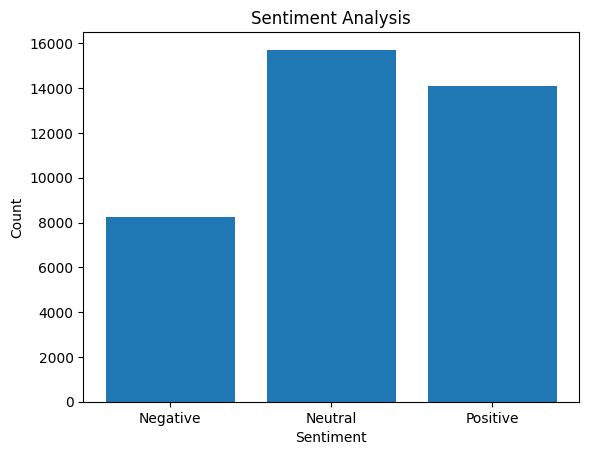

In [ ]:
import matplotlib.pyplot as plt

# groupby sentiment and count values
counts = df.groupby('textblob').size()

# create bar plot
plt.bar(counts.index, counts.values)

# set axis labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis')

# show plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

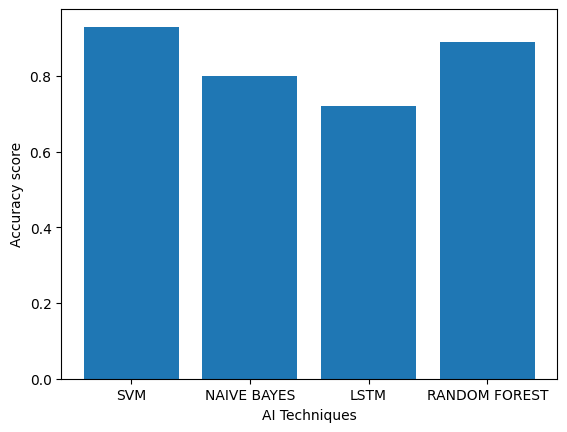

In [ ]:
values = [0.93, 0.80, 0.72, 0.89]
labels = ['SVM', 'NAIVE BAYES', 'LSTM', 'RANDOM FOREST']
plt.xlabel('AI Techniques')
plt.ylabel('Accuracy score')
plt.bar(labels, values)
plt.show()

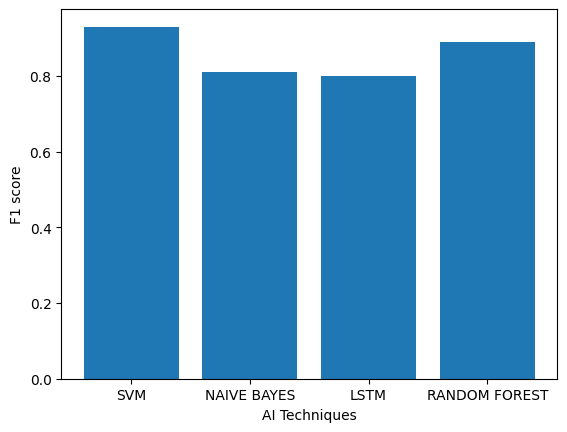

In [ ]:
values = [0.93, 0.81, 0.80, 0.89]
labels = ['SVM', 'NAIVE BAYES', 'LSTM', 'RANDOM FOREST']
plt.xlabel('AI Techniques')
plt.ylabel('F1 score')
plt.bar(labels, values)
plt.show()